In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from homer_preprocessing import read_homer_gene_exp, import_homer_diffgene, pull_comparisons_get_diff
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano, plot_exp_rpkm, gene_list_bar_plot

In [2]:
workingDirectory = '/home/h1bennet/strains_rna/results/H00_Strains_Control_Hepatocyte_RNA/'
dataDirectory = '/home/h1bennet/strains/data/RNA/control_hepatocyte/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


# Check qc stats

In [3]:
qc = ngs_qc(dataDirectory)

/home/h1bennet/strains/data/RNA/control_hepatocyte//
./control_hepatocyte_qc/


/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/gpfs/data01/glasslab/home/h1bennet/.conda/envs/dataviz/lib/python3.7/site-packages/statsm

<Figure size 432x288 with 0 Axes>

In [4]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
AJ_M_Liver_Hepatocyte_RNA_notx_CG_1_VML_s20180131_GTCCGC.aj.star_shifted_from_AJ.sam,3485185.0,75.0,0.005318,4.131,2.721857e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AJ_M_Liver_Hepatocyte_RNA_notx_CG_2_VML_s20180131_GTGAAA.aj.star_shifted_from_AJ.sam,4279051.0,75.0,0.007456,4.708,2.721180e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BALB_M_Liver_Hepatocyte_RNA_notx_CG_1_VML_s20180131_GTGGCC.balbcj.star_shifted_from_BALBCJ.sam,2675145.0,75.0,0.009633,9.787,2.721385e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BALB_M_Liver_Hepatocyte_RNA_notx_CG_2_VML_s20180131_GTTTCG.balbcj.star_shifted_from_BALBCJ.sam,1537624.0,75.0,0.006273,11.096,2.720229e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C57_M_Liver_Hepatocyte_RNA_notx_CG_1_VML_s20180131_ATGTCA.c57bl6j.star_shifted_from_C57BL6J.sam,2349831.0,75.0,0.004667,5.276,2.722086e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C57_M_Liver_Hepatocyte_RNA_notx_CG_2_VML_s20180131_CCGTCC.c57bl6j.star_shifted_from_C57BL6J.sam,3640307.0,75.0,0.007761,5.681,2.721932e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C57_M_Liver_Hepatocyte_RNA_notx_CG_3_VML_s20180131_GTAGAG.c57bl6j.star_shifted_from_C57BL6J.sam,4060178.0,75.0,0.006735,4.512,2.721880e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Run Oyoung's pipeline to process RNA-seq data consistantly.

In [5]:
c57_paths = list(np.sort(glob.glob(dataDirectory+'/C57*')))
balbc_paths = list(np.sort(glob.glob(dataDirectory+'/BALB*')))
aj_paths = list(np.sort(glob.glob(dataDirectory+'/AJ*')))

In [6]:
c57_ids = [i.split('/')[-1].split('_')[7] for i in c57_paths]
balbc_ids = [i.split('/')[-1].split('_')[7] for i in balbc_paths]
aj_ids = [i.split('/')[-1].split('_')[7] for i in aj_paths]

In [7]:
ids = ['c57_hepatocyte_control',
       'balbc_hepatocyte_control',
       'aj_hepatocyte_control']
colors = ['#31a354',
          '#3182bd',
          '#de2d26']
paths = [';'.join(c57_paths),
         ';'.join(balbc_paths),
         ';'.join(aj_paths)]
short_ids = [';'.join([ids[0]+'_'+i for i in c57_ids]),
             ';'.join([ids[1]+'_'+i for i in balbc_ids]),
             ';'.join([ids[2]+'_'+i for i in aj_ids])]

In [8]:
pd.DataFrame([ids,colors,paths,short_ids]).T.to_csv('./sampleDef.txt',
                                                    sep='\t',
                                                    header=False,
                                                    index=False)

# Run O'young RNA pipeline

Run the code below in BASH

    source activate r-ouyangPipe
    
    mkdir ./expression/
    
    mkdir ./differential/
    
    rnaQuan.R ./sampleDef.txt -o ./expression/

    rnaDiff.R ./sampleDef.txt -c ./expression/rawC.txt \
    -t ./expression/rawT.txt -o ./differential/

    # annotate scatter files with tag counts
    for scatter in ./differential/*scatter.txt;
    do diff2Homer.R -d $scatter -q ./expression/HOMER.rawTPM.txt;
    done

### Make sure to check the PCA pdf file for outliers

# Import differential gene files for examination and plotting

In [14]:
if not os.path.isdir('./gene_lists/'):
    os.mkdir('./gene_lists')

In [15]:
strains = ['aj', 'balb', 'c57']
log2fc = 1
padj = 0.05

In [16]:
gene_list_dict ={}

In [17]:
for strain in strains:
    # initialize gene lists
    g_intersect = set()
    g_union = set()
    for i in glob.glob('./differential/'+strain+'*homer.txt'):
        print(i)
        # read in gene expression data
        df, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
            depath=i,
            gepath='./expression/HOMER.rawTPM.txt',
            gene_name_index=True)

        # select differential genes
        df = df.loc[~(df.chr.str.contains('chrX|chrY|ChrUn')), :]
        sig_genes = df.index[(df['padj'] < padj) & (df['log2FoldChange'] <= -log2fc)].to_list()
        
        # add to sets
        if len(g_union) == 0:
            g_union = set(sig_genes)
            g_intersect = set(sig_genes)
        else:
            g_union = g_union.union(sig_genes)
            g_intersect = g_intersect.intersection(sig_genes)
        
        # print('union set length:', print(len(g_union)))
        # print('intersection set length:', print(len(g_intersect)))
    
    # after getting union and intersection sets add to dict
    gene_list_dict[strain+'_union'] = list(g_union)
    gene_list_dict[strain+'_intersection'] = list(g_intersect)
        

./differential/aj_hepatocyte_control.vs.balbc_hepatocyte_control.scatter.homer.txt
ge all transcripts (24940, 14)
Diff Gene selected transcripts (5511, 14)
ge selected transcripts (5511, 14)
./differential/aj_hepatocyte_control.vs.c57_hepatocyte_control.scatter.homer.txt
ge all transcripts (24940, 14)
Diff Gene selected transcripts (5503, 14)
ge selected transcripts (5503, 14)
./differential/balbc_hepatocyte_control.vs.c57_hepatocyte_control.scatter.homer.txt
ge all transcripts (24940, 14)
Diff Gene selected transcripts (5658, 14)
ge selected transcripts (5658, 14)
./differential/balbc_hepatocyte_control.vs.aj_hepatocyte_control.scatter.homer.txt
ge all transcripts (24940, 14)
Diff Gene selected transcripts (5511, 14)
ge selected transcripts (5511, 14)
./differential/c57_hepatocyte_control.vs.balbc_hepatocyte_control.scatter.homer.txt
ge all transcripts (24940, 14)
Diff Gene selected transcripts (5658, 14)
ge selected transcripts (5658, 14)
./differential/c57_hepatocyte_control.vs.aj_h

In [18]:
for key in gene_list_dict.keys():
    print(key)
    print(len(gene_list_dict[key]), 'genes')
    with open('./gene_lists/'+key+'_hepatocyte_control_genes_fc_'+str(log2fc)+'_pval_'+str(padj)+'.txt', 'w') as f:
        f.write('Gene\n')
        for i in gene_list_dict[key]:
            f.write(i+'\n')
        f.close()

aj_union
209 genes
aj_intersection
25 genes
balb_union
235 genes
balb_intersection
57 genes
c57_union
288 genes
c57_intersection
59 genes


# Plot potential nichenet ligands

In [14]:
if not os.path.isdir('./figures/'):
    os.mkdir('./figures')

Read in raw expression values

In [15]:
tpm_mat = pd.read_csv('./expression/rawT.txt', sep='\t', index_col=0)

Read in nichenet ligand list

In [16]:
ligands = pd.read_csv('/home/h1bennet/data/gene_lists/nichenet_ligands.txt',
                      sep='\t')['x'].str.capitalize().tolist()
ligands[:5]

['Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl5', 'Ppbp']

## Intersection ligands

In [17]:
act = []
for key in gene_list_dict.keys():
    if 'intersection' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

In [18]:
act_ligands

{'Nrg4', 'Tnfsf10'}

In [22]:
groups = [[0,1,2],
          [3,4],
          [5,6]]

group_labels = ['C57BL/6J LSEC Control young',
                'Balb/cJ LSEC Control young',
                'AJ LSEC Control young']

colors = ['#74c476',
          '#6baed6',
          '#de2d26']

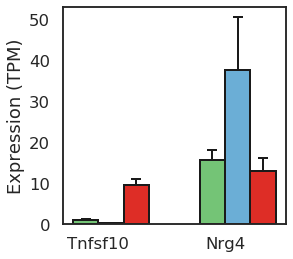

In [24]:
fig, ax = plt.subplots(figsize=(4, 4))

gene_list_bar_plot(act_ligands,
                   tpm_mat,
                   groups=groups,
                   group_labels = group_labels,
                   colors = colors,
                   ax=ax,
                   width=0.2)

ax.get_legend().remove()

# Look at union gene set

In [25]:
act = []
for key in gene_list_dict.keys():
    if 'union' in key:
        act.extend(gene_list_dict[key])

act = set(act)
# overlap with ligands
act_ligands = act.intersection(ligands)

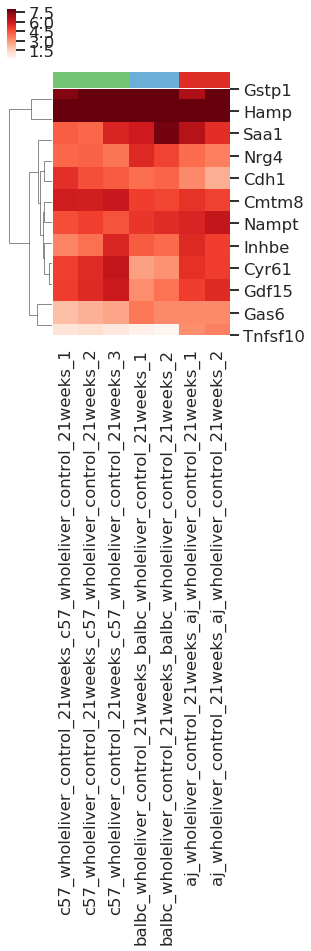

In [29]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    #z_score=0,
    cmap='Reds',
    #vmin=-2,
    vmax=8,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6',
          '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap.png', bbox_inches='tight')
# plt.close()

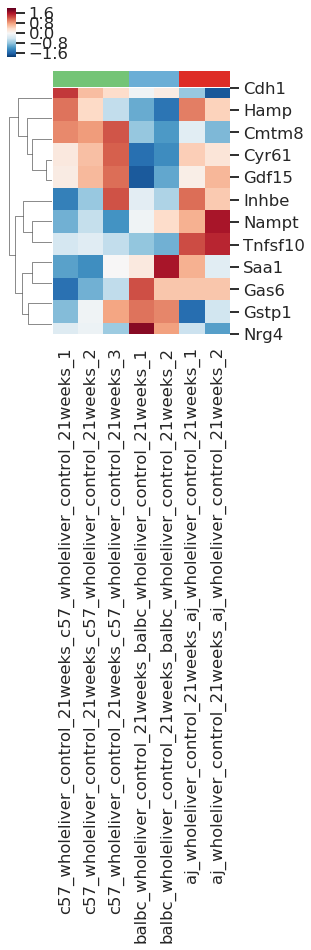

In [28]:
sns.clustermap(
    np.log2(tpm_mat.loc[act_ligands]+1),
    col_cluster=False,
    z_score=0,
    cmap='RdBu_r',
    vmin=-2,
    vmax=2,
    col_colors = ['#74c476', '#74c476', '#74c476',
          '#6baed6', '#6baed6',
          '#de2d26', '#de2d26'],
    figsize=(4,6),
    yticklabels=1)

plt.savefig('./figures/diff_genes_union_ligands_clustermap_zscore.png', bbox_inches='tight')
# plt.close()